In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# List files to find the correct one
!ls "/content/drive/MyDrive/Internship/Dataset .csv"

# Replace 'Dataset.csv' with the exact name from the output above
df = pd.read_csv('/content/drive/MyDrive/Internship/Dataset .csv')

# Preview the data
df.head()


Mounted at /content/drive
'/content/drive/MyDrive/Internship/Dataset .csv'


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Restaurant Reviews

In [3]:
df.rename(columns={"Rating text":"Reviews"},inplace=True)

Q1. Analyze the text reviews to identify the most common positive and negative keywords.

In [4]:
df.Reviews.unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

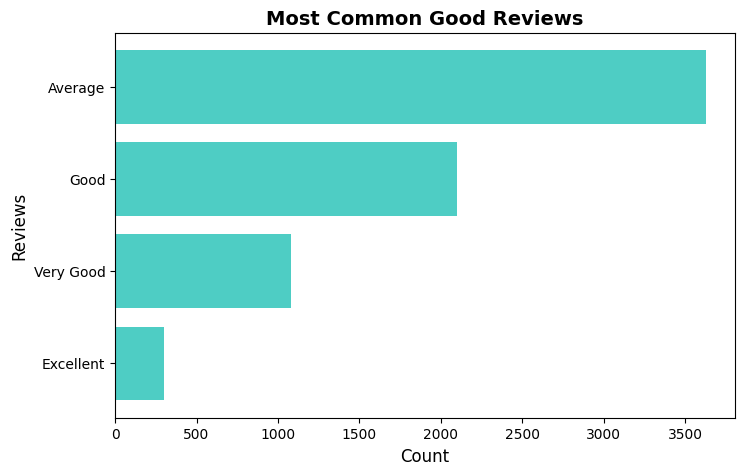

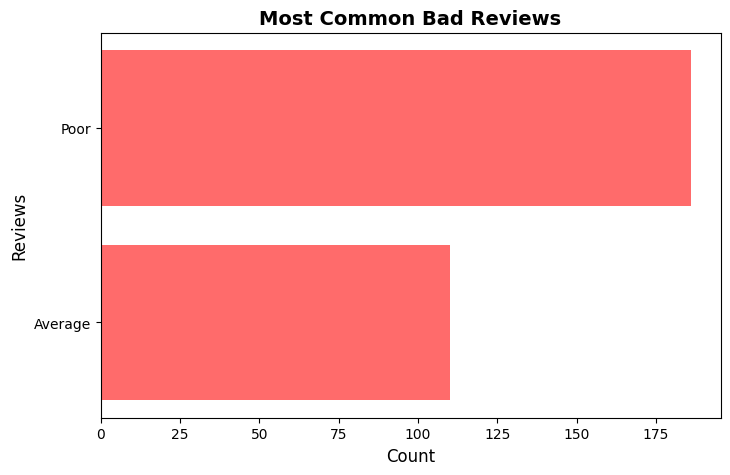

In [5]:
from collections import Counter

# Step 1: Filter out empty reviews
df_filtered = df[df['Reviews'] != "Not rated"]

# Step 2: Filter Reviews Based on "Aggregate rating"
bad_reviews = df_filtered[df_filtered['Aggregate rating'] <= 2.5]['Reviews']
good_reviews = df_filtered[df_filtered['Aggregate rating'] >= 2.6]['Reviews']

# Step 3: Count the Frequency of Reviews
bad_counts = Counter(bad_reviews)
good_counts = Counter(good_reviews)

# Step 4: Convert to DataFrames for Plotting
bad_df = pd.DataFrame(bad_counts.items(), columns=['Review', 'Count']).sort_values(by='Count', ascending=False).head(10)
good_df = pd.DataFrame(good_counts.items(), columns=['Review', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Step 5: Plot Bar Charts
def plot_bar_chart(df, title, color):
    plt.figure(figsize=(8, 5))
    plt.barh(df['Review'], df['Count'], color=color)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Reviews", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest count on top
    plt.show()

# Generate Bar Charts
plot_bar_chart(good_df, "Most Common Good Reviews", color='#4ECDC4')  # Teal tone
plot_bar_chart(bad_df, "Most Common Bad Reviews", color='#FF6B6B')  # Red tone

Q2. Calculate the average length of reviews andexplore if there is a relationship between review length and rating.

📌 The average review length is 7.0 characters.




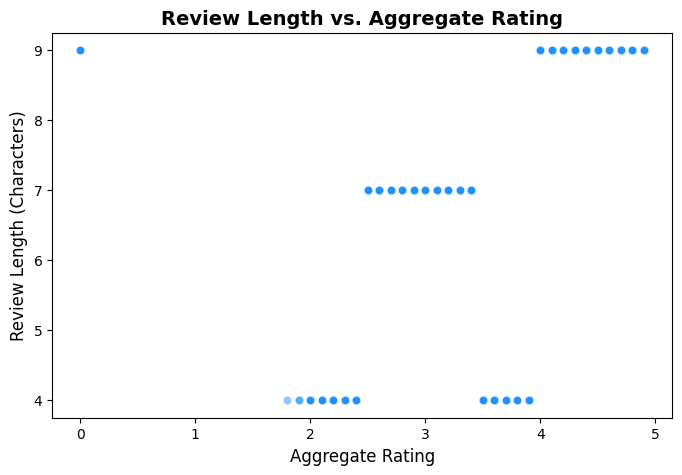

In [6]:
# Step 1: Remove missing reviews
df_filtered = df[df['Reviews'].notna()].copy()

# Step 2: Calculate Review Length (Character Count)
df_filtered['Review_Length'] = df_filtered['Reviews'].apply(lambda x: len(x.strip()))

# Step 3: Calculate Average Review Length
average_review_length = round(df_filtered['Review_Length'].mean(), 2)
print(f"📌 The average review length is {average_review_length.round()} characters.")

print("\n")
# Step 4: Scatter Plot - Review Length vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered['Aggregate rating'], y=df_filtered['Review_Length'], alpha=0.5, color='dodgerblue')

plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Review Length (Characters)", fontsize=12)
plt.title("Review Length vs. Aggregate Rating", fontsize=14, fontweight='bold')

plt.show()


Task 2: Votes Analysis

Q1. Identify the restaurants with the highest andlowest number of votes

In [7]:
# Aggregate votes by restaurant
restaurant_votes = df.groupby('Restaurant Name', as_index=False)['Votes'].sum()

# Find the restaurant with the highest and lowest votes
most_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmax()]
least_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmin()]

# Print the results
print(f"🏆 The restaurant with the highest votes is {most_voted_restaurant['Restaurant Name']} with {most_voted_restaurant['Votes']} votes.")
print(f"⚠️ The restaurant with the lowest votes is {least_voted_restaurant['Restaurant Name']} with {least_voted_restaurant['Votes']} votes.")



🏆 The restaurant with the highest votes is Barbeque Nation with 28142 votes.
⚠️ The restaurant with the lowest votes is #hashtag with 0 votes.


Q2. Analyze if there is a correlation between thenumber of votes and the rating of arestaurant.

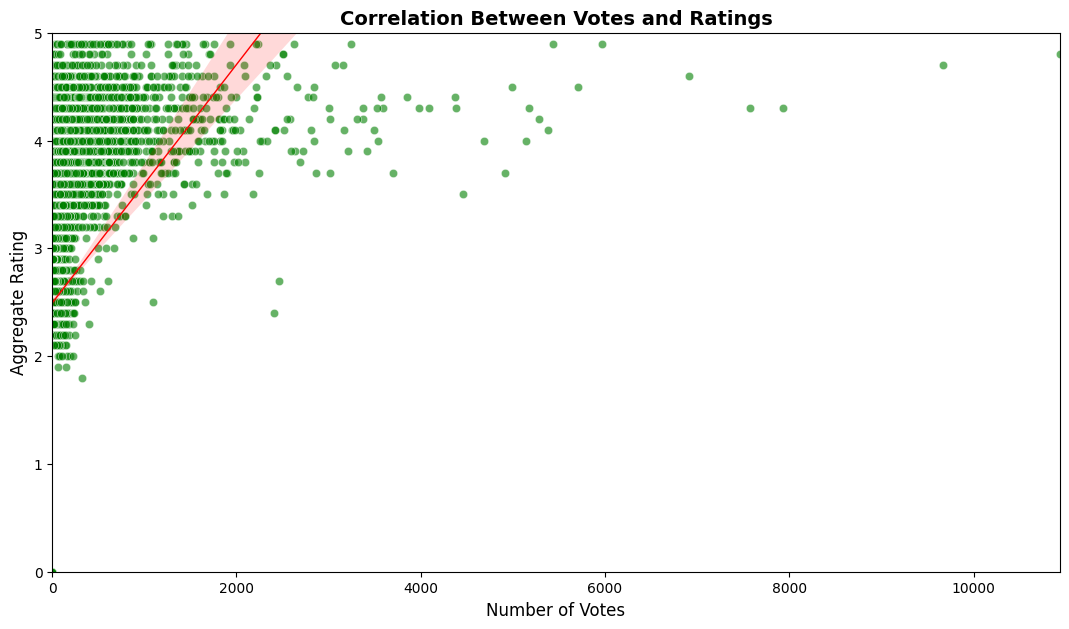

In [8]:
plt.figure(figsize=(13, 7))

# Scatter plot (Votes on X-axis, Rating on Y-axis)
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.6, color='green')

# Thin trend line (with swapped axes)
sns.regplot(x=df['Votes'], y=df['Aggregate rating'], scatter=False, color='red', line_kws={'linewidth': 1})

# Adjust axis limits
plt.xlim(df['Votes'].min(), df['Votes'].max())  # Votes on X-axis
plt.ylim(0, 5)  # Ratings on Y-axis

plt.xlabel("Number of Votes", fontsize=12)  # Now Votes is X-axis
plt.ylabel("Aggregate Rating", fontsize=12)  # Now Ratings is Y-axis
plt.title("Correlation Between Votes and Ratings", fontsize=14, fontweight='bold')

plt.show()


Task 3: Price Range vs. Online Delivery and Table Booking

Q3. Analyze if there is a relationship between the price range and the availability of online delivery and table booking. Determine if higher-priced restaurants are more likely to offer these services.

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Reviews', 'Votes'],
      dtype='object')

In [10]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


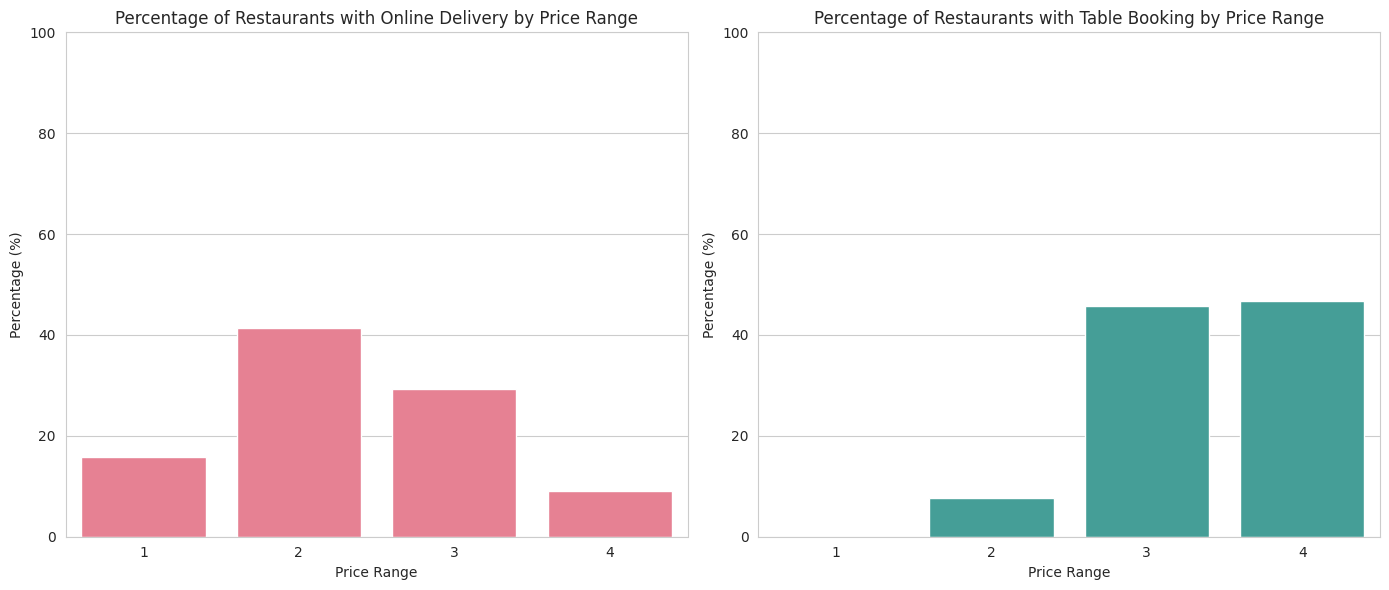

In [12]:
# Set whitegrid style
sns.set_style('whitegrid')

# Ensure proper data formatting
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Has Table booking'] = df['Has Table booking'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# Group by Price range
price_group = df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

# Convert the mean to percentage
price_group['Has Online delivery'] *= 100
price_group['Has Table booking'] *= 100

# Display results
print(price_group)

# Define unique colors
colors = sns.color_palette("husl", 2)  # Unique hues

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Online Delivery Plot
sns.barplot(x='Price range', y='Has Online delivery', data=price_group, ax=axes[0], color=colors[0])
axes[0].set_title('Percentage of Restaurants with Online Delivery by Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100)

# Table Booking Plot
sns.barplot(x='Price range', y='Has Table booking', data=price_group, ax=axes[1], color=colors[1])
axes[1].set_title('Percentage of Restaurants with Table Booking by Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


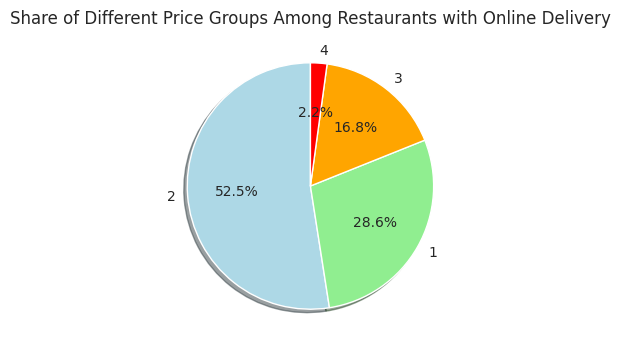

In [13]:
# Filter only restaurants that have online delivery
online_delivery_df = df[df['Has Online delivery'] == 1]

# Count the number of restaurants in each price range
price_group_counts = online_delivery_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage = (price_group_counts / price_group_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(price_group_percentage, labels=price_group_percentage.index, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'], shadow=True)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Online Delivery')

# Display the chart
plt.show()

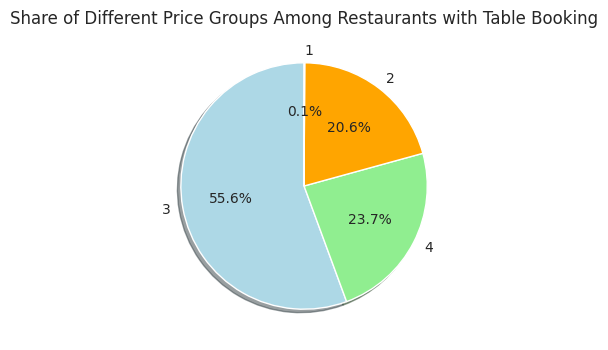

In [14]:

# Filter only restaurants that have table booking
table_booking_df = df[df['Has Table booking'] == 1]

# Count the number of restaurants in each price range
price_group_counts_table = table_booking_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage_table = (price_group_counts_table / price_group_counts_table.sum()) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(price_group_percentage_table, labels=price_group_percentage_table.index, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'], shadow=True)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Table Booking')

# Display the chart
plt.show()